<a href="https://colab.research.google.com/github/sdw1621/shinhan_university/blob/main/%EC%8B%A0%ED%95%9C%EB%8C%80_4%EC%A3%BC%EC%B0%A8_%EC%9C%A0%ED%8A%9C%EB%B8%8C_%ED%81%AC%EB%A1%A4%EB%A7%811.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**1. pytube 패키지 설치**

In [ ]:
!pip install pytube

     |████████████████████████████████| 56 kB 2.4 MB/s 


###**2. pytube 패키지 중 YouTube 함수 호출**

####**2-1. url(aespa 에스파 'Next Level' MV) 정보로 동영상 가져오기**

In [ ]:
# pytube API 사이트
# https://pytube.io/en/latest/user/quickstart.html

from pytube import YouTube

# aespa 에스파 'Next Level' MV
yt = YouTube("https://www.youtube.com/watch?v=4TWR90KJl84")

###**3. 동영상 정보가져오기**

####**3-1. url 정보 중에 제목(title) 가져오기**

In [ ]:
print(yt.title)

aespa 에스파 'Next Level' MV


####**3-2. url 정보 중에 동영상 길이(length) 가져오기**

In [ ]:
# 동영상 길이
length = yt.length

print(yt.length)

236


####**3-3. url 정보 중에 동영상 썸네일(thumbnail) 가져오기**

In [ ]:
# 동영상 썸네일
thumbnail_url = yt.thumbnail_url

print(thumbnail_url)

https://i.ytimg.com/vi/4TWR90KJl84/sddefault.jpg


####**3-4. url 정보들(제목, 동영상 길이, 채널명, 썸네일, 조회수, 상세설명) 가져오기(수업에서는 스킵)**

In [ ]:
# 제목
title = yt.title
# 동영상 길이
length = yt.length
# 동영상 채널명
author = yt.author
# 동영상 썸네일
thumbnail_url = yt.thumbnail_url
# 동영상 조회수
views = yt.views
# 동영상 상세설명
description = yt.description.strip()

####**3-5. 동영상 플레이리스트 출력 (수업에서는 스킵, 학생분들 실습)**

In [ ]:
# https://www.kejisen.com/ko/article/206016741.html
# https://www.debugcn.com/ko/article/47205317.html
# https://github.com/pytube/pytube/issues/869
# https://m.blog.naver.com/arfwene/221555916226

# regex
# https://www.kejisen.com/ko/article/203567939.html
# https://www.inflearn.com/questions/8706

import pytube
from pytube.exceptions import VideoPrivate

# 여자가수 뮤비 모음
pl = pytube.Playlist("https://www.youtube.com/watch?v=c9RzZpV460k&list=PLaq57sKEfJoYJeCHS8e3hDSI8otocnEnz")
print(pl)

for video in pl.videos:
    try:
      print(video.title)
    except VideoUnavailable:
      pass  # Skip videos that can't be loade
    except VideoPrivate:
      continue
    finally:
      print("\n")

###**4. 썸네일 이미지 다운로드**

In [ ]:
import urllib.request
print(yt.thumbnail_url)

yt.title = yt.title.replace("/","_")

urllib.request.urlretrieve(yt.thumbnail_url, f'{yt.title}.jpg')

https://i.ytimg.com/vi/4TWR90KJl84/sddefault.jpg


("aespa 에스파 'Next Level' MV.jpg", <http.client.HTTPMessage at 0x7f29d72113d0>)

###**5. 동영상 다운로드**

####**5-1. 전체 동영상 정보 보기(스킵)**

In [ ]:
# https://pytube.io/en/latest/user/streams.html#downloading-streams

print("stream 객체 전체보기 :")

yt_streams_list = yt.streams

for i in range(len(yt_streams_list)): 
    print(i, ":",yt_streams_list[i]) # itag, res로 sort 되는지 확인

stream 객체 전체보기 :
0 : <Stream: itag="17" mime_type="video/3gpp" res="144p" fps="12fps" vcodec="mp4v.20.3" acodec="mp4a.40.2" progressive="True" type="video">
1 : <Stream: itag="18" mime_type="video/mp4" res="360p" fps="24fps" vcodec="avc1.42001E" acodec="mp4a.40.2" progressive="True" type="video">
2 : <Stream: itag="22" mime_type="video/mp4" res="720p" fps="24fps" vcodec="avc1.64001F" acodec="mp4a.40.2" progressive="True" type="video">
3 : <Stream: itag="313" mime_type="video/webm" res="2160p" fps="24fps" vcodec="vp9" progressive="False" type="video">
4 : <Stream: itag="401" mime_type="video/mp4" res="2160p" fps="24fps" vcodec="av01.0.12M.08" progressive="False" type="video">
5 : <Stream: itag="271" mime_type="video/webm" res="1440p" fps="24fps" vcodec="vp9" progressive="False" type="video">
6 : <Stream: itag="400" mime_type="video/mp4" res="1440p" fps="24fps" vcodec="av01.0.12M.08" progressive="False" type="video">
7 : <Stream: itag="137" mime_type="video/mp4" res="1080p" fps="24fps" v

####**5-2. 확장자 .mp4, 프로그래시브, 해상도 높은 동영상부터 나열하여 보여주기**

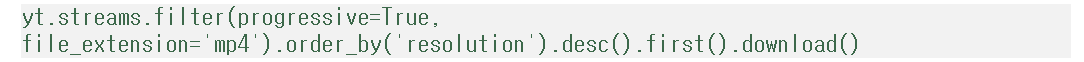

In [ ]:
# https://seolin.tistory.com/93

for video in yt.streams.filter(progressive=True, file_extension='mp4').order_by('resolution').desc():
    print(str(video))

<Stream: itag="22" mime_type="video/mp4" res="720p" fps="24fps" vcodec="avc1.64001F" acodec="mp4a.40.2" progressive="True" type="video">
<Stream: itag="18" mime_type="video/mp4" res="360p" fps="24fps" vcodec="avc1.42001E" acodec="mp4a.40.2" progressive="True" type="video">


####**5-3. 사용자가 원하는 동영상 다운로드**

In [ ]:
stream = yt.streams.get_by_itag(22)
stream.download()

'/content/aespa 에스파 Next Level MV.mp4'

###**6. 자막 추출하기**

####**6-1. 자막 정보 보기**

In [ ]:
# aespa 에스파 'Next Level' MV
yt = YouTube('https://www.youtube.com/watch?v=4TWR90KJl84')

# YouTube 객체에서 caption 객체를 가져옴
yt_captions = yt.captions

print("다운가능한 영상 자막 정보 :")
for i, cap in enumerate(yt.captions.all()):
    print(i, " : ", cap)

다운가능한 영상 자막 정보 :
0  :  <Caption lang="Chinese" code="zh">
1  :  <Caption lang="English" code="en">
2  :  <Caption lang="Indonesian" code="id">
3  :  <Caption lang="Japanese" code="ja">
4  :  <Caption lang="Korean" code="ko">
5  :  <Caption lang="Thai" code="th">
6  :  <Caption lang="Vietnamese" code="vi">


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated function all (This object can be treated as a dictionary).
  


In [ ]:
print("언어를 선택하세요 (code 입력, 소문자로 입력, ex. 한국어 : ko): ") # 코드를 입력해야 됨

code = input()
my_caption = yt_captions[code]

print("선택된 caption : ", my_caption.code)

언어를 선택하세요 (code 입력, 소문자로 입력, ex. 한국어 : ko): 
ko
선택된 caption :  ko


####**6-2. 자막 추출하기**

In [ ]:
caption = yt.captions[my_caption.code]

if caption == None:
    caption = yt.captions.all()[0]

print(caption.xml_captions)

<?xml version="1.0" encoding="utf-8" ?><timedtext format="3">
<body>
<p t="16430" d="3246">I’m on the Next Level yeah</p>
<p t="19676" d="2286">절대적 룰을 지켜</p>
<p t="21962" d="3999">내 손을 놓지 말아 결속은 나의 무기</p>
<p t="25961" d="2640">광야로 걸어가</p>
<p t="28601" d="2147">알아 네 Home ground</p>
<p t="30748" d="3895">위협에 맞서서 제껴라 제껴라 제껴라</p>
<p t="37847" d="4494">상상도 못한 Black out 유혹은 깊고 진해</p>
<p t="46621" d="4941">맞잡은 손을 놓쳐 난 절대 포기 못해</p>
<p t="51562" d="2786">I’m on the Next Level</p>
<p t="54348" d="2652">저 너머의 문을 열어</p>
<p t="57000" d="2477">Next Level 널</p>
<p t="59477" d="1965">결국엔 내가 부셔</p>
<p t="61442" d="4327">Next Level KOSMO에 닿을 때까지</p>
<p t="65769" d="4168">Next Level 제껴라 제껴라 제껴라</p>
<p t="69937" d="2176">La la la la la la</p>
<p t="72113" d="2184">La la la la la la</p>
<p t="74297" d="2202">La la la la la la</p>
<p t="76499" d="1733">La la la la la</p>
<p t="78232" d="2497">I see the NU EVO.</p>
<p t="80729" d="3633">적대적인 고난과 슬픔은</p>
<p t="84362" d="2889">널 더 Popping 진화시켜</p>
<p t="87251"

####**6-3. 자막만 뽑아내기**

In [ ]:
import re

content = re.sub("<(/)?([a-zA-Z]*)(\\s[a-zA-Z]*=[^>]*)?(\\s)*(/)?>", "", caption.xml_captions)

print(content[39:].strip()) # 38일 때 >가 출력되므로, 39부터 끝까지 출력 후 strip으로 공백 제거

# 문자열 슬라이싱1
# print(content.index("<")) # 0 
# print(content.rindex(">")) # 38

# 문자열 슬라이싱2
# start = content.find("<")
# print(start)
# end = content.rfind(">")
# print(end)

# 참고 사이트
# https://blog.jiktong.kr/entry/정규식을-이용해-html-태그-제거하기
# https://data-newbie.tistory.com/206
# https://www.fun-coding.org/DS&AL3-4.html
# http://zeany.net/46
# https://wikidocs.net/4308
# https://webisfree.com/2020-07-28/[python]-태그만-제거하는-방법-정규표현식

I’m on the Next Level yeah
절대적 룰을 지켜
내 손을 놓지 말아 결속은 나의 무기
광야로 걸어가
알아 네 Home ground
위협에 맞서서 제껴라 제껴라 제껴라
상상도 못한 Black out 유혹은 깊고 진해
맞잡은 손을 놓쳐 난 절대 포기 못해
I’m on the Next Level
저 너머의 문을 열어
Next Level 널
결국엔 내가 부셔
Next Level KOSMO에 닿을 때까지
Next Level 제껴라 제껴라 제껴라
La la la la la la
La la la la la la
La la la la la la
La la la la la
I see the NU EVO.
적대적인 고난과 슬픔은
널 더 Popping 진화시켜
That’s my nævis It’s my nævis
You lead, we follow 감정들을 배운 다음
Watch me while I make it out
Watch me while I work it out
Watch me while I make it out
Watch me while I work it out
Work it work it work it out
감당할 수 없는 절망도
내 믿음을 깨지 못해
더 아픈 시련을 맞아도 난
잡은 손을 놓지 않을게 Oh
절대로 뒤를 돌아보지 말아
광야의 것 탐내지 말아
약속이 깨지면 모두 걷잡을 수 없게 돼
언제부턴가 불안해져 가는 신호
널 파괴하고 말 거야
Come on! Show me the way to KOSMO Yeah
Black Mamba가 만들어낸 환각 퀘스트
aespa, ae를 분리시켜놓길 원해 그래
중심을 잃고 목소리도 잃고
비난받고 사람들과 멀어지는 착각 속에 
naevis 우리 ae, ae들을 불러봐
aespa의 Next Level “P.O.S”를 열어봐
이건 REAL WORLD 깨어났어
We against the villain
What’s the name?
Black Mamba
결국 난 문을 열어
그 빛은 네겐 Fire
난 궁금해 미치겠어
이다

In [ ]:
# youtube-dl 패키지 사용법
# https://theqoo.net/japan/1960161485

# 쥬피터 노트북에서 실행해야 동작됨
# https://drive.google.com/file/d/1m-kK74SUDqG6cLkJQ5xFRFTS7JT4y1On/view?usp=sharing

####**6-기타. pytube 패키지 버그 (210912_작동 안 됨) - 실행 X**

In [ ]:
# https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=skyshin0304&logNo=221620513883

print("언어를 선택하세요 (code 입력): ")
code = input()
my_caption = yt_captions.get_by_language_code(code)
print("선택된 caption : ", my_caption)
print("선택된 자막 보여주기 :")
# print(my_caption.generate_srt_captions()) # error

print("end")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated function all (This object can be treated as a dictionary).
  del sys.path[0]


다운가능한 영상 자막 정보 :
0  :  <Caption lang="English" code="en">
1  :  <Caption lang="Indonesian" code="id">
2  :  <Caption lang="Japanese" code="ja">
3  :  <Caption lang="Korean" code="ko">
4  :  <Caption lang="Korean (auto-generated)" code="a.ko">
언어를 선택하세요 (code 입력): 
ko
선택된 caption :  <Caption lang="Korean" code="ko">
선택된 자막 보여주기 :


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: Call to deprecated function get_by_language_code (This object can be treated as a dictionary, i.e. captions['en']).


KeyError: ignored